# Tabular models

In [2]:
from fastai.tabular import *

Tabular data should be in a Pandas `DataFrame`.

In [3]:
path = Path('data')
df = pd.read_csv(path/'tips.csv')

In [31]:
dep_var = 'tip'
cat_names = ['sex', 'smoker', 'day', 'time']
cont_names = ['total_bill', 'size']
procs = [FillMissing, Categorify, Normalize]

In [32]:
test = TabularList.from_df(df.iloc[196:244].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [33]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(196,244)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [34]:
data.show_batch(rows=10)

sex,smoker,day,time,total_bill,size,target
Female,Yes,Sat,Dinner,2.7861,0.4412,2.5
Male,No,Thur,Lunch,-1.1398,-0.5883,1.73
Female,No,Thur,Lunch,-0.9578,-0.5883,2.0
Male,Yes,Fri,Dinner,2.3164,1.4707,4.73
Male,No,Sat,Dinner,-0.2300,-0.5883,3.27
Male,No,Thur,Lunch,-0.6303,-0.5883,2.5
Male,No,Sun,Dinner,-0.2891,0.4412,2.74
Female,No,Sat,Dinner,0.1010,1.4707,2.45
Male,No,Fri,Dinner,0.3057,-0.5883,3.5
Female,Yes,Thur,Lunch,0.0009,-0.5883,4.19


In [35]:
def accuracy_long(input:Tensor, targs:Tensor)->Rank0Tensor:
    n = targs.shape[0]
    input = input.argmax(dim=-1).view(n,-1)
    targs = targs.view(n,-1).long()
    return (input==targs).float().mean()

In [36]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy_long)

In [37]:
learn.fit(1, 1e-2)

epoch,train_loss,valid_loss,accuracy_long,time
0,13.478836,8.693954,0.000000,00:00


In [38]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy_long,time
0,9.964876,8.947736,0.000000,00:00
1,9.782571,9.000011,0.000000,00:00
2,9.621668,8.951900,0.000000,00:00
3,9.526687,8.949455,0.000000,00:00


In [28]:
learn.save('stage-1')

In [29]:
learn.unfreeze()

In [30]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


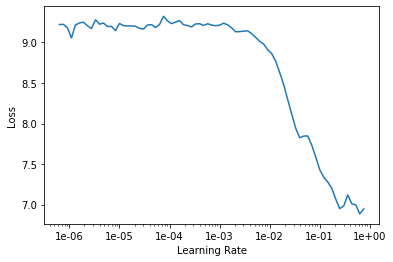

In [15]:
learn.recorder.plot()

In [16]:
learn.fit(1, 1e-5)

epoch,train_loss,valid_loss,accuracy_long,time
0,9.232384,9.045886,0.000000,00:00


## Inference

In [17]:
row = df.iloc[0]

In [18]:
learn.predict(row)

(FloatItem [0.022907], tensor([0.0229]), tensor([0.0229]))